<a href="https://colab.research.google.com/github/tashkinovnet/Home-Task/blob/Hometask_4/Hometask_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hometask 4


####Домашнее задание - подготовить отчет для министерства транспорта, раскрывающий характер и особенности задержек авиарейсов. Отчет должен помочь увидеть проблемные точки и способствовать принятию решений. Поэтому стремитесь не констатировать общие факты, а показывать проблемы. Например, сам по себе факт "средняя задержка вылета составляет 15 минут" мало о чем говорит и не помогает понять, из-за чего так происходит. Напротив, график, показывающий, что по понедельникам опоздания возрастают в три раза по сравнению с остальными днями на фоне возрастания числа рейсов и пассажиров, подсказывает возможную причину проблемы: аэропорты не справляются с неравномерной нагрузкой.
####Отчет должен быть оформлен в виде ноутбука с четкой структурой. Вначале в ячейке Markdown идет краткое описание исследуемого вопроса (что будем изучать), затем код и все его выводы (таблицы, графики, величины), после этого снова в ячейке Markdown в которой сформулирован ваш краткий вывод.
####В отчете должно быть не менее 5 результатов, подтвержденных графиками. Для разнообразия материала используйте различные типы диаграмм. Все графики должны быть снабжены необходимыми подписями (обозначения осей, заголовок, легенда цветовая схема).
####Для решения задач используйте методы библиотеки pandas.


### Flight delay data has been analysed to identify problem areas that could cause schedule disruptions. Identification of these factors will help to make informed decisions at the level of the Ministry of Transport to improve operational efficiency and reduce inconvenience to passengers.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### First we need to deal with the days of the week.

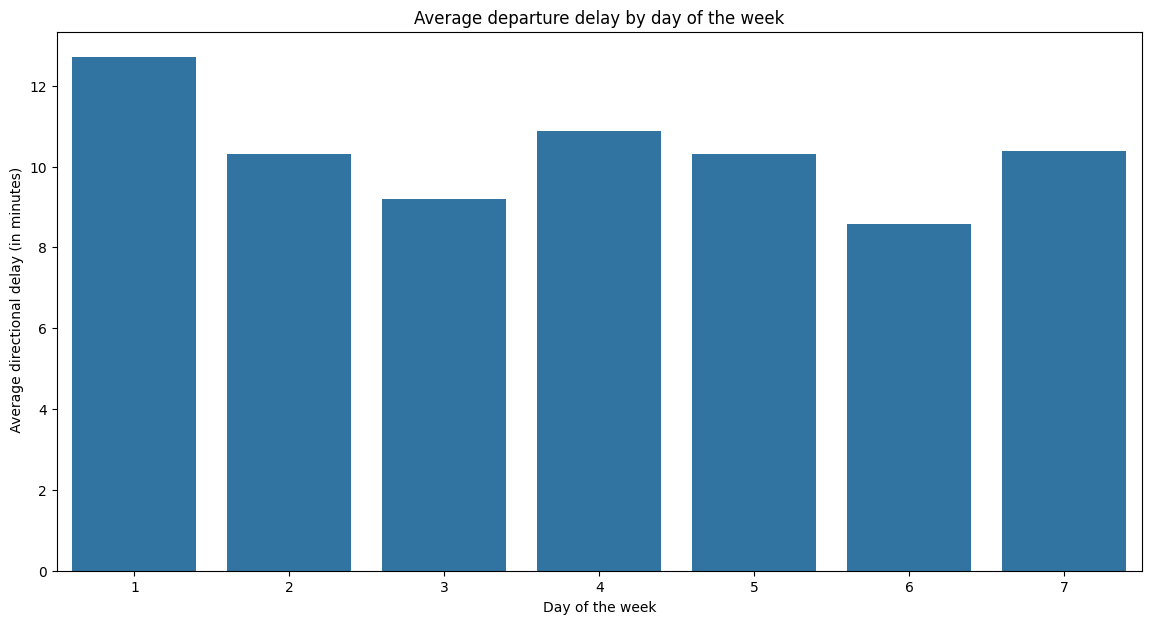

In [13]:
df = pd.read_csv('flights.csv')

delay_by_day = df.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean().sort_values()

plt.figure(figsize = (14, 7))
sns.barplot(x = delay_by_day.index, y=delay_by_day.values)
plt.xlabel('Day of the week')
plt.ylabel(' Average directional delay (minutes)')
plt.title('Average departure delay by day of the week')
plt.show()

## Conclusion:
### The biggest delays in departure are observed on Monday, which may be due to the fact that it is the beginning of the working week. Such data indicates the need for additional analysis of the load on airports on these days and development of measures to optimise the schedule.

### In this section we look at how holidays affect flight delays. This is important for identifying the critical days when airports are most stressed, resulting in longer delays. The knowledge gained can help airports and airlines better allocate their resources to minimise downtime.

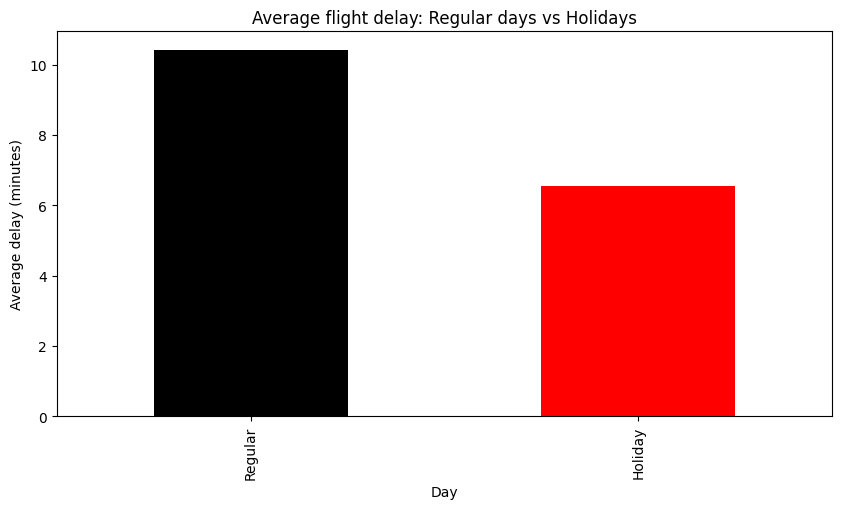

In [22]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

holidays = ['2015-01-01', '2015-12-25', '2015-07-04', '2015-10-31', '2015-03-08']

df['IS_HOLIDAY'] = df['DATE'].dt.strftime('%Y-%m-%d').isin(holidays)

delays_by_holiday = df.groupby('IS_HOLIDAY')['DEPARTURE_DELAY'].mean()

plt.figure(figsize = (10, 5))
delays_by_holiday.plot(kind = 'bar', color = ['black', 'red'])
plt.title('Average flight delay: Regular days vs Holidays')
plt.xlabel('Day')
plt.ylabel('Average delay (minutes)')
plt.xticks(ticks = [0, 1], labels = ['Regular', 'Holiday'])
plt.show()

## Conclusion:
### Based on the graph, we can conclude that there is no significant difference between the average delay time on public holidays and normal days. This may indicate the reliability of the air transport system during periods of increased passenger traffic.


### Seasonality of delays can help identify the periods of the year when airlines and airports face the greatest operational difficulties. Such data can help take measures to mitigate the impact of seasonal factors such as weather conditions or increased passenger traffic during holiday periods.

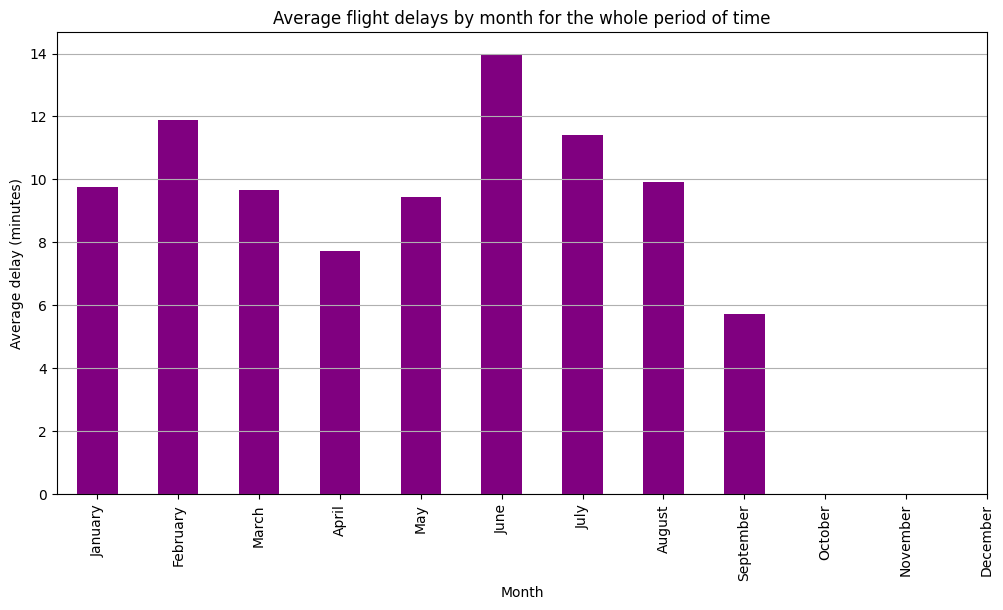

In [38]:
monthly_delays = df.groupby('MONTH')['DEPARTURE_DELAY'].mean()

plt.figure(figsize = (12,6))
monthly_delays.plot(kind = 'bar', color = 'purple')
plt.title('Average flight delays by month for the whole period of time')
plt.xlabel('Month')
plt.ylabel('Average delay (minutes)')
plt.xticks(range(12), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(axis = 'y')
plt.show()

## Conclusion:
### The graph of average delays by month shows that the highest average flight delays occur in June, July and February. This may be due to seasonal increase in passenger traffic or difficult weather conditions. Based on this data, it is worth considering increasing the number of staff and airport resources during these periods to reduce delays.


### We will now examine in detail how the departure airport affects flight delays. Some airports may have problems with infrastructure or passenger flow management, which can lead to longer delays. Analysing this data will reveal which airports need additional measures to reduce the number and duration of delays.

<ipython-input-32-847cfa9e1a48>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_airports.values, y = top_airports.index, palette = "vlag")


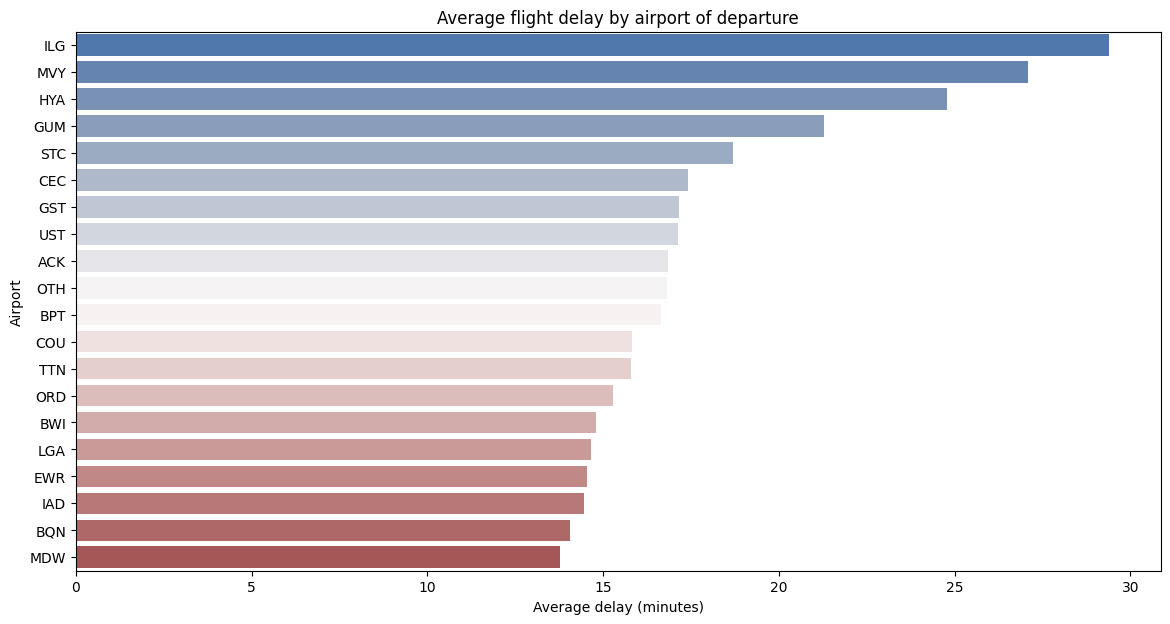

<ipython-input-33-847cfa9e1a48>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_airports.values, y = top_airports.index, palette = "vlag")


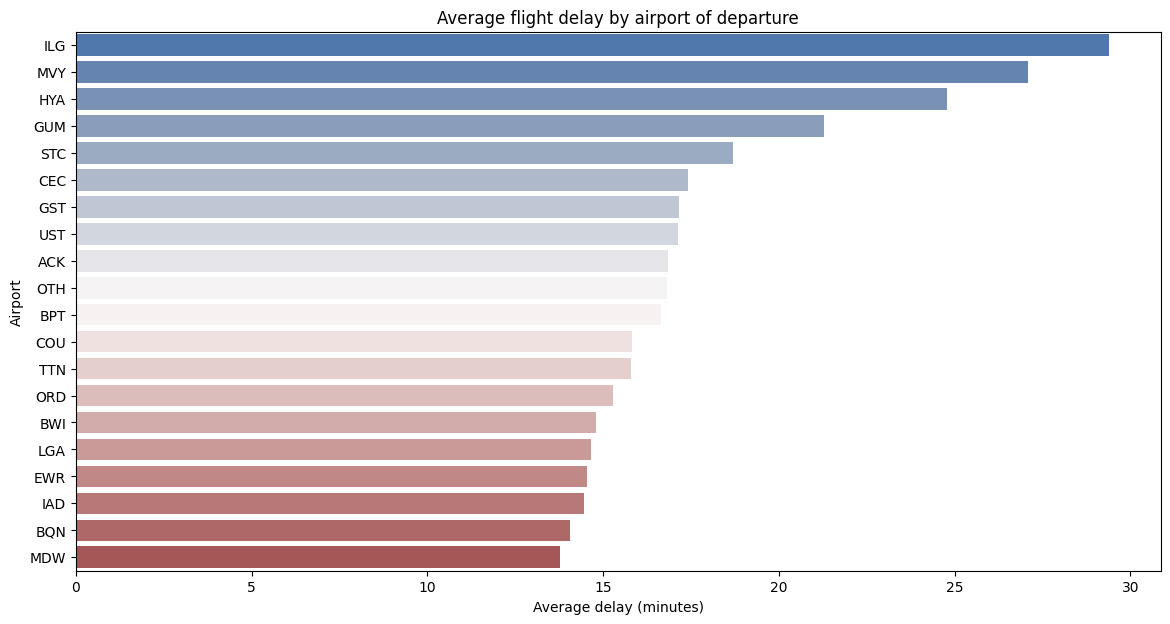

In [33]:
airport_delays = df.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending = False)

top_airports = airport_delays.head(20)

plt.figure(figsize = (14, 7))
sns.barplot(x = top_airports.values, y = top_airports.index, palette = "vlag")
plt.title('Average flight delay by airport of departure')
plt.xlabel('Average delay (minutes)')
plt.ylabel('Airport')
plt.show()

## Conclusion:
### The graph shows that airports ILG, MVY, HYA are the leaders in terms of average delay time. This may indicate serious bottlenecks at these airports. Possible congestion, insufficient runways or baggage handling problems could be the causes of these delays. A more detailed audit of operations at these airports is recommended to identify specific problems and develop strategies to address them.


### It should be noted that a comparison of airlines by average flight delays will allow us to identify which carriers face this problem more often than others. The identification of such airlines can serve as a basis for further in-depth study of their internal operational processes to find out the causes of delays and develop measures to prevent or minimise them.

<ipython-input-30-1632731de677>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = airline_delays.index, x = airline_delays.values, palette = "coolwarm")


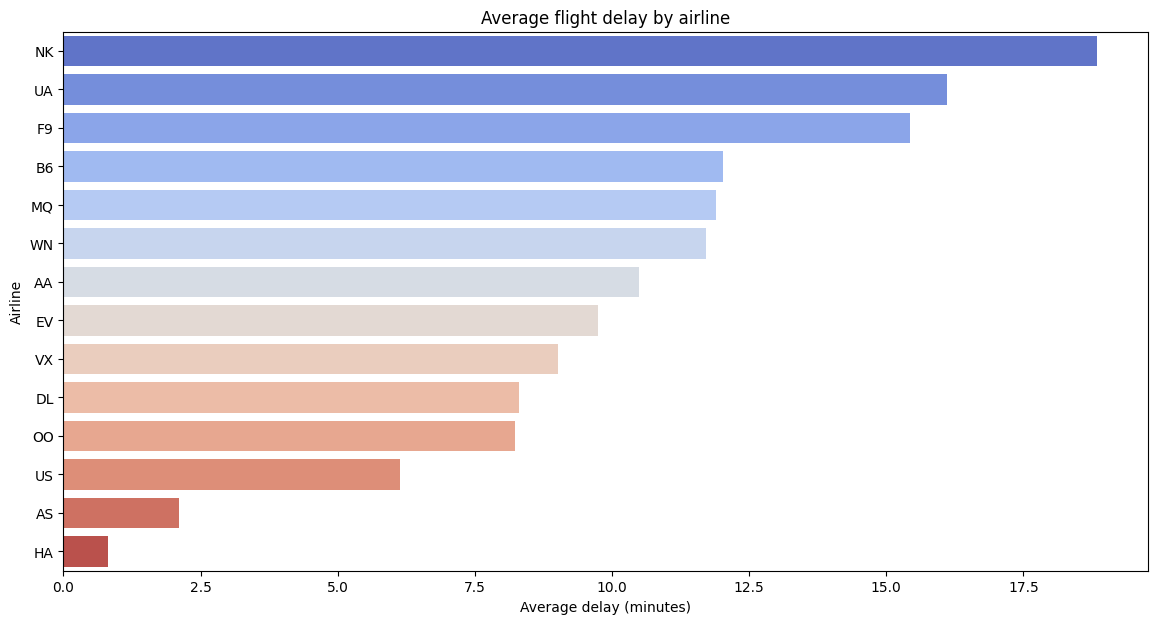

In [30]:
airline_delays = df.groupby('AIRLINE')['DEPARTURE_DELAY'].mean().sort_values(ascending = False)

plt.figure(figsize = (14, 7))
sns.barplot(y = airline_delays.index, x = airline_delays.values, palette = "coolwarm")
plt.title('Average flight delay by airline')
plt.xlabel('Average delay (minutes)')
plt.ylabel('Airline')
plt.show()

## Conclusion:
### Based on the visualisation, we see that NK, UA, F9 airlines have the highest average departure delays. This can be attributed to various factors including logistics, schedule management, and the technical condition of the fleet. It follows that these airlines may require a closer look at their pre-flight procedures and optimisation opportunities.
